<a href="https://colab.research.google.com/github/TheFlopEngineer/Fake-news-detection/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%%html
<style>
table {float:left}
</style>

### BDA Project : Fake News Detection

|Name|ROll No.|
|:-| -:| 
|Vikas Kumar|2K17/CO/370|

In [6]:
import numpy as np
import pandas as pd

In [8]:
fake_news = pd.read_csv('Fake.csv')
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
fake_news['flag'] = 0
fake_news

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [10]:
real_news = pd.read_csv('True.csv')
real_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [11]:
real_news['flag'] = 1
real_news

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
# concatenating fake_news and real_news
news = [fake_news, real_news]
news  = pd.concat(news, ignore_index=True)
news

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [14]:
# shuffle dataset
news = news.sample(frac=1 )
news

,title,text,subject,date,flag
39742,Exclusive: Death certificate offers clues on R...,MOSCOW (Reuters) - An official document seen b...,worldnews,"October 27, 2017",1
43510,Japan foreign minister thinks North Korea miss...,TOKYO (Reuters) - Japanese Foreign Minister Ta...,worldnews,"September 14, 2017",1
9304,JOHN CONYERS’ LAWYER Threatens ‘If This Nonsen...,"Rep. John Conyers lawyer, Arnold Reed, threat...",politics,"Dec 1, 2017",0
13024,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,politics,"Sep 13, 2016",0
8014,KARMA: Conservative Group’s Plan To Sabotage ...,Thanks to a conservative group that tried to r...,News,"February 18, 2016",0
...,...,...,...,...,...
14871,The American Energy Success Story Obama Won’t ...,Obama has waisted billions on green energy but...,politics,"Nov 29, 2015",0
1267,Kellyanne Conway’s Husband Blasts Trump’s Tra...,Kellyanne Conway may still be loyal to Donald ...,News,"June 5, 2017",0
38059,"China, Russia to hold simulated anti-missile d...",BEIJING (Reuters) - The Chinese and Russian mi...,worldnews,"November 17, 2017",1
14235,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",politics,"Mar 21, 2016",0


### Data Visualization

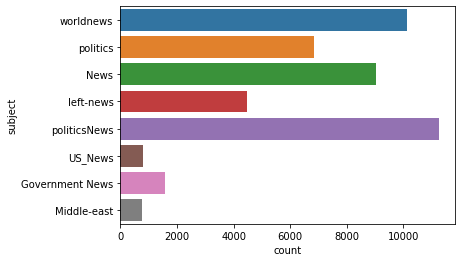

In [15]:
import seaborn as sns
sns.countplot(y = "subject", data = news)

In [16]:
# save data for manual verification of model

news_manual_testing = news.tail(20)
news_manual_testing.to_csv('news_manual_testing')
news.drop(news.tail(20).index,inplace=True) # drop last n rows
news

,title,text,subject,date,flag
39742,Exclusive: Death certificate offers clues on R...,MOSCOW (Reuters) - An official document seen b...,worldnews,"October 27, 2017",1
43510,Japan foreign minister thinks North Korea miss...,TOKYO (Reuters) - Japanese Foreign Minister Ta...,worldnews,"September 14, 2017",1
9304,JOHN CONYERS’ LAWYER Threatens ‘If This Nonsen...,"Rep. John Conyers lawyer, Arnold Reed, threat...",politics,"Dec 1, 2017",0
13024,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,politics,"Sep 13, 2016",0
8014,KARMA: Conservative Group’s Plan To Sabotage ...,Thanks to a conservative group that tried to r...,News,"February 18, 2016",0
...,...,...,...,...,...
18394,TRUMP DRIVES CRITICS CRAZY: Eliminates Obama’s...,"Meanwhile, back at CNN Russia Russia Russia!Th...",left-news,"Jul 2, 2017",0
36515,Turkey says declaring Jerusalem Israel's capit...,ANKARA (Reuters) - The Turkish government s sp...,worldnews,"December 6, 2017",1
29150,Labor Dept. looks into delaying fiduciary rule...,WASHINGTON (Reuters) - The U.S. Labor Departme...,politicsNews,"February 3, 2017",1
34585,Trump says U.S. economy in a 'bubble' he doesn...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"January 26, 2016",1


### Data Cleaning

In [17]:
# remove duplicate
news = news.drop_duplicates()
news.shape

(44669, 5)

In [18]:
# merge subject, title and text to get complete news text data
news['news_data'] = news['subject'] + news['title'] + news['text']
news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,text,subject,date,flag,news_data
39742,Exclusive: Death certificate offers clues on R...,MOSCOW (Reuters) - An official document seen b...,worldnews,"October 27, 2017",1,worldnewsExclusive: Death certificate offers c...
43510,Japan foreign minister thinks North Korea miss...,TOKYO (Reuters) - Japanese Foreign Minister Ta...,worldnews,"September 14, 2017",1,worldnewsJapan foreign minister thinks North K...
9304,JOHN CONYERS’ LAWYER Threatens ‘If This Nonsen...,"Rep. John Conyers lawyer, Arnold Reed, threat...",politics,"Dec 1, 2017",0,politicsJOHN CONYERS’ LAWYER Threatens ‘If Thi...
13024,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,politics,"Sep 13, 2016",0,politicsBREAKING: MORE HACKED E-MAILS From DNC...
8014,KARMA: Conservative Group’s Plan To Sabotage ...,Thanks to a conservative group that tried to r...,News,"February 18, 2016",0,News KARMA: Conservative Group’s Plan To Sabot...
...,...,...,...,...,...,...
18394,TRUMP DRIVES CRITICS CRAZY: Eliminates Obama’s...,"Meanwhile, back at CNN Russia Russia Russia!Th...",left-news,"Jul 2, 2017",0,left-newsTRUMP DRIVES CRITICS CRAZY: Eliminate...
36515,Turkey says declaring Jerusalem Israel's capit...,ANKARA (Reuters) - The Turkish government s sp...,worldnews,"December 6, 2017",1,worldnewsTurkey says declaring Jerusalem Israe...
29150,Labor Dept. looks into delaying fiduciary rule...,WASHINGTON (Reuters) - The U.S. Labor Departme...,politicsNews,"February 3, 2017",1,politicsNewsLabor Dept. looks into delaying fi...
34585,Trump says U.S. economy in a 'bubble' he doesn...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"January 26, 2016",1,politicsNewsTrump says U.S. economy in a 'bubb...


In [19]:
# remove unnecessary data
news = news.drop(['subject', 'title', 'text', 'date'], axis=1)
news

,flag,news_data
39742,1,worldnewsExclusive: Death certificate offers c...
43510,1,worldnewsJapan foreign minister thinks North K...
9304,0,politicsJOHN CONYERS’ LAWYER Threatens ‘If Thi...
13024,0,politicsBREAKING: MORE HACKED E-MAILS From DNC...
8014,0,News KARMA: Conservative Group’s Plan To Sabot...
...,...,...
18394,0,left-newsTRUMP DRIVES CRITICS CRAZY: Eliminate...
36515,1,worldnewsTurkey says declaring Jerusalem Israe...
29150,1,politicsNewsLabor Dept. looks into delaying fi...
34585,1,politicsNewsTrump says U.S. economy in a 'bubb...


In [20]:
# check if there is no null values
news.isnull().sum()

flag         0
news_data    0
dtype: int64

In [22]:
# function to convert the news text in lowercase and remove punctuation special chars., extra space, urls
import re
import string
def normalize(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [23]:
# normalizing news text
news["news_data"] = news["news_data"].apply(normalize)
news

,flag,news_data
39742,1,worldnewsexclusive death certificate offers c...
43510,1,worldnewsjapan foreign minister thinks north k...
9304,0,politicsjohn conyers lawyer threatens if thi...
13024,0,politicsbreaking more hacked e mails from dnc...
8014,0,news karma conservative group s plan to sabot...
...,...,...
18394,0,left newstrump drives critics crazy eliminate...
36515,1,worldnewsturkey says declaring jerusalem israe...
29150,1,politicsnewslabor dept looks into delaying fi...
34585,1,politicsnewstrump says u s economy in a bubb...


#### Defining independent and dependent variable as x and y

In [24]:
x = news["news_data"]  # independent variable
y = news["flag"]       # dependent variable

#### Splitting the dataset into training set and testing set.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert a collection of raw documents to a matrix of TF-IDF features.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 1. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
LR.score(xv_test, y_test)

0.9888073065902578

In [44]:
pred_lr=LR.predict(xv_test)    
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5900
           1       0.99      0.99      0.99      5268

    accuracy                           0.99     11168
   macro avg       0.99      0.99      0.99     11168
weighted avg       0.99      0.99      0.99     11168



### 2. Decision Tree Classification

In [45]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)  # build a decision tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
DT.score(xv_test, y_test)

0.9976719197707736

In [47]:
pred_dt = DT.predict(xv_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5900
           1       1.00      1.00      1.00      5268

    accuracy                           1.00     11168
   macro avg       1.00      1.00      1.00     11168
weighted avg       1.00      1.00      1.00     11168



### 3. Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
GBC.score(xv_test, y_test)

0.9962392550143266

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5900
           1       0.99      1.00      1.00      5268

    accuracy                           1.00     11168
   macro avg       1.00      1.00      1.00     11168
weighted avg       1.00      1.00      1.00     11168



### 4. Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)    # Build a forest of decision trees from the training set

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
RFC.score(xv_test, y_test)

0.991493553008596

In [54]:
pred_rfc = RFC.predict(xv_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5900
           1       0.99      0.99      0.99      5268

    accuracy                           0.99     11168
   macro avg       0.99      0.99      0.99     11168
weighted avg       0.99      0.99      0.99     11168



## Model Testing

In [55]:
def result(flag):
    if flag:
        return "real news"
    else:
        return "fake news"

def verify(news):
    news = {"text":[news]}
    news = pd.DataFrame(news)
    news["text"] = news["text"].apply(normalize) 
    news = news["text"]
    news_vector = vectorization.transform(news)
    pred_LR = LR.predict(news_vector)
    pred_DT = DT.predict(news_vector)
    pred_GBC = GBC.predict(news_vector)
    pred_RFC = RFC.predict(news_vector)

    print(f"""
            LR Prediction: {result(pred_LR[0])} \n
            DT Prediction: {result(pred_DT[0])} \n
            GBC Prediction: {result(pred_GBC[0])} \n
            RFC Prediction: {result(pred_RFC[0])}
        """)

In [57]:
news = input()
# news
verify(news)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve